In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

import os

In [41]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

In [42]:
TARGET_SIZE = (100, 100)

## Data Augmentation 

In [43]:
datagen = ImageDataGenerator(
    rotation_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2, 1.5]
)

In [59]:
data = os.path.join(os.getcwd(), 'dataset/processed_split/train')

train_generator = datagen.flow_from_directory(   
    data, 
    target_size=TARGET_SIZE,
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

type(train_generator[0])

Found 1280 images belonging to 16 classes.


tuple

In [45]:
def open_images():
    """returns the images and labels of the images in the folder

    Returns:
        np array: images_arr
        np array: labels_arr
    """
    images_arr = []
    labels_arr = []
    counter = 0
    for class_name in os.listdir('./dinos_processed'):
        for image in os.listdir(f'./dinos_processed/{class_name}'):
            img = Image.open(f'./dinos_processed/{class_name}/{image}')
            img_gray = img.convert('L')  # convert image to grayscale
            images_arr.append(np.array(img_gray))
            labels_arr.append(class_name.lower())

        counter += 1

        if counter == 3:
            break # only two classes for now

    return np.array(images_arr), np.array(labels_arr)
    


Son 100 imagenes, de 100x100, en los 3 canales RGB.

In [46]:
np.unique(y)

array(['parasaurolophus', 'spinosaurus', 'therizinosaurus'], dtype='<U15')

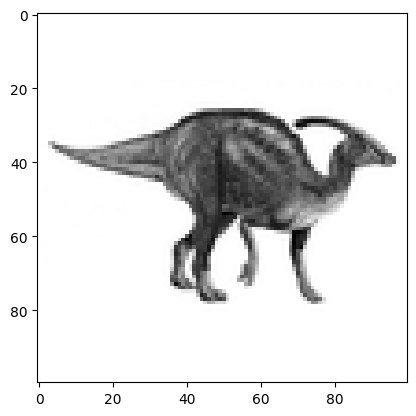

In [47]:
plt.imshow(x[10], cmap='gray')

In [48]:
# We split the data into training and testing
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [50]:
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
np.unique(train_labels)

array([0, 1, 2])

In [51]:
num_classes = len(np.unique(y))
print("number of classes: ", num_classes)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)
train_labels

number of classes:  3


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [52]:
train_labels.shape
train_labels[0]

array([0., 0., 1.])

## Modelo de Datos

In [53]:
base_filters = 32
w_regularizer = 1e-4

In [54]:
model = tf.keras.Sequential()

# First layer
model.add(Conv2D(filters=base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu', input_shape=(100,100,1)))
model.add(Activation('relu'))

# Second layer
model.add(Conv2D(filters=2*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Third layer
model.add(Conv2D(filters=2*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fourth layer
model.add(Conv2D(filters=2*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fifth layer
model.add(Conv2D(filters=4*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))

# Sixth layer
model.add(Conv2D(filters=4*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten the output
model.add(Flatten())
model.add(Dense(16, activation='softmax'))

model.summary()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        55,299 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,411 (1.41 MB)

 Trainable params: 369,411 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [60]:
hist = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=50, verbose=1)

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 16), output.shape=(None, 3)

In [ ]:
# Assuming test_images and test_labels are your testing data and labels
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 1s - 365ms/step - accuracy: 0.7167 - loss: 2.1862

Test accuracy: 0.7166666388511658


## Save model 

In [ ]:
# Save the model
model.save('out/cnn2.keras')